# 4章 顧客の全体像を把握する

引き続き、スポーツジムの会員データを使って顧客の行動を分析していきます。  
３章で顧客の全体像を把握しました。  
ここからは、機械学習を用いて顧客のグループ化や顧客の利用予測行なっていきましょう。  
ここでは、教師なし学習、教師あり学習の回帰を取り扱います。

### ノック31：データを読み込んで確認しよう

In [99]:
import pandas as pd
customer= pd.read_csv('customer_join.csv')
customer.isnull().sum()

customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64

In [100]:
uselog = pd.read_csv('use_log.csv')
uselog.isnull().sum()

log_id         0
customer_id    0
usedate        0
dtype: int64

### ノック32：クラスタリングで顧客をグループ化しよう

In [101]:
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47


In [102]:
# 顧客データから月内利用履歴に関するデータを抜き出す。
customer_clustering = customer[['mean','median','max','min', 'membership_period']]
customer_clustering.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


In [103]:
# K-means法を用いる。変数間の距離をベースにグループ化を行う。
# グルーピングを行う際に前もって、グループの数を指定する。今回は４つのグループ。
# 月内利用回数に関する['mean','median','max','min']と['membership_period']ではデータが大きく異なるので標準化が必要。

# KMeansはデータを似た特徴を持つグループに分ける。クラスタアルゴリズムの一つ。
from sklearn.cluster import KMeans
# StandardScalerはデータの標準化を行うためのクラス。異なるスケールの特徴量を同じスケールに揃える。データの平均が0、分散を1に変換。
from sklearn.preprocessing import StandardScaler

# StandardScalerのインスタンスを作成.pandasのpdと同じ
sc = StandardScaler()
# StandardScalerアルゴリズムでfit_transformメソッドを使って、customer_clusteringデータを標準化する
# transformメソッドはfitの計算結果を使ってデータを標準化
customer_clustering_sc = sc.fit_transform(customer_clustering)

# クラスタリングのために標準化された顧客データを含む変数
customer_clustering_sc


array([[-0.28120614, -0.13367635,  0.08117747, -0.5336197 ,  2.03402524],
       [-0.14054502, -0.13367635, -0.37992814, -0.02114919,  2.03402524],
       [-0.42186727, -0.13367635, -0.84103375, -0.02114919,  2.03402524],
       ...,
       [ 1.50050144,  1.46662237,  0.08117747,  2.54120338, -1.28811491],
       [ 3.18843493,  3.06692109,  1.46449428,  4.07861492, -1.28811491],
       [ 2.62579043,  2.53348819,  1.00338868,  3.56614441, -1.28811491]])

In [104]:
# KMeans()でモデルの構築をする
# 引数n_clusters = 4　はクラスタを４分割、引数random_state = 0　は再現性を確保するための乱数シードを設定
kmeans = KMeans(n_clusters = 4, random_state = 0)
# KMeans()アルゴリズムを使って、fit()でクラスタに分けるための中心（セントロイド）を計算する。
# クラスタ中心が変わらなくなるまで「データポイントの割り当て」と「クラスタ中心の更新」を繰り返し処理する
# clusters にはクラスタリングの結果が格納
clusters = kmeans.fit(customer_clustering_sc)

#clustersで各データポイントがどのクラスタに割り当てられているかを示すラベルを格納する。
customer_clustering.loc[:, 'cluster'] = clusters.labels_
print(customer_clustering['cluster'].unique())
customer_clustering.head()

[2 1 0 3]


/tmp/ipykernel_51776/3135739746.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_clustering.loc[:, 'cluster'] = clusters.labels_


,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,2
1,5.083333,5.0,7,3,47,2
2,4.583333,5.0,6,3,47,2
3,4.833333,4.5,7,2,47,2
4,3.916667,4.0,6,1,47,2


### ノック33：クラスタリング結果を分析しよう

In [105]:
customer_clustering.columns = ['月内平均値', '月内中央値', '月内最大値', '月内最小値','会員期間', 'cluster']

In [106]:
customer_clustering.groupby('cluster').count()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
0,1334,1334,1334,1334,1334
1,771,771,771,771,771
2,1249,1249,1249,1249,1249
3,838,838,838,838,838


In [107]:
# 会員期間の0,2グループは、1,3グループと比較して長い。
# 会員期間が長い2は0と比較すると、利用率が低い。
# 
customer_clustering.groupby('cluster').mean()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
0,5.541974,5.392804,8.757871,2.704648,14.857571
1,3.065504,2.900130,4.783398,1.649805,9.276265
2,4.677561,4.670937,7.233787,2.153723,36.915933
3,8.064079,8.050716,10.014320,6.180191,7.016706


### ノック34：クラスタリング結果を可視化してみよう

In [111]:
# 5つの変数を二次元上にプロットする場合、次元削除を行ます。

# PCAは主成分分析のこと
from sklearn.decomposition import PCA
X = customer_clustering_sc

# PCAのインスタンスを作成（主成分を2つに設定、データを2次元に次元削減）
pca = PCA(n_components = 2)

# データに基づいてPCAモデルを学習
# 具体的には、データの共分散行列を計算し、固有ベクトル（主成分）と固有値を特定（統計検定準一、一級レベル）
# これにより、データの分散を最大化する方向（主成分）が見つかる。
pca.fit(X)

# 学習したPCAモデルを使ってデータを主成分空間に変換。これにより、次元削減されたデータが得られる。
x_pca = pca.transform(X)

# 変換されたデータをDataFrameに変換
pca_df = pd.DataFrame(x_pca)


pca_df.loc[:, 'cluster'] = customer_clustering['cluster']

pca_df.head()

,0,1,cluster
0,-0.819982,-1.959097,2
1,-0.707922,-1.799857,2
2,-1.061499,-1.659826,2
3,-1.160764,-1.810139,2
4,-2.017132,-1.670101,2


In [115]:
# 寄与率の計算
explained_variance_ratio = pca.explained_variance_ratio_

# データフレームの作成
explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio': explained_variance_ratio
})

# 累積寄与率の計算とデータフレームへの追加
explained_variance_df['Cumulative Explained Variance'] = explained_variance_df['Explained Variance Ratio'].cumsum()

explained_variance_df

# 第一主成分が70%,第二主成分が20%の寄与率であることがわかる。第一主成分の方がデータの変動を大きく表すことに留意して分析を行う。

,Principal Component,Explained Variance Ratio,Cumulative Explained Variance
0,PC1,0.690427,0.690427
1,PC2,0.189375,0.879802


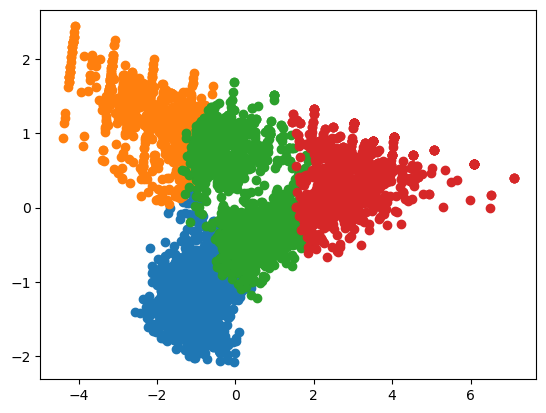

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in customer_clustering['cluster'].unique():
    tmp = pca_df.loc[pca_df['cluster'] == i]
    # plt.scatter(x軸,y軸)は、散布図を作るための関数
    plt.scatter(tmp[0], tmp[1])

# 緑は第一、第二主成分に影響がないグループ
# 赤は第一主成分強いが、第二主成分に影響がないグループ
# 青は第一主成分がやや弱く、第二主成分が弱いグループ
# 橙は第一主成分が弱いが、第二主成分が強いグループ


In [ ]:
#主成分分析の注意点
#・各主成分の持つ意味は分からない
# -主成分分析を行うと、計算で自動的に主成分を作成する
# -作成した主成分がどのような意味を持っているのかは、自力で考察する必要がある
# -基本的には最初に主成分寄与率や主成分得点をみて各主成分の特性を把握する
# -次にその特性を考慮して各主成分の意味を考察する
# -主成分の持つ意味を考察する時は、なるべく多くの人と結果を共有して慎重に意味付けを行っていく必要がある
 
#・寄与率が低すぎて役に立たないこともある
# -変数が多すぎるデータの場合は寄与率が低くなりがち
# -例えば第1主成分と第2主成分の累積寄与率が10%以下の場合、それらの主成分を使って表したグラフは、全データの10%以下の情報しか含まれていないことになる

In [80]:
# 寄与率の計算
explained_variance_ratio = pca.explained_variance_ratio_

# データフレームの作成
explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio': explained_variance_ratio
})

# 累積寄与率の計算とデータフレームへの追加
explained_variance_df['Cumulative Explained Variance'] = explained_variance_df['Explained Variance Ratio'].cumsum()

print(explained_variance_df)

  Principal Component  Explained Variance Ratio  Cumulative Explained Variance
0                 PC1                  0.690427                       0.690427
1                 PC2                  0.189375                       0.879802


### ノック35：クラスタリング結果をもとに退会顧客の傾向を把握しよう

### ノック36：翌月の利用回数予測を行うためのデータ準備をしよう

### ノック37：特徴となる変数を付与しよう

### ノック38：来月の利用回数予測モデルを作成しよう

### ノック39：モデルに寄与している変数を確認しよう

### ノック40：来月の利用回数を予測しよう